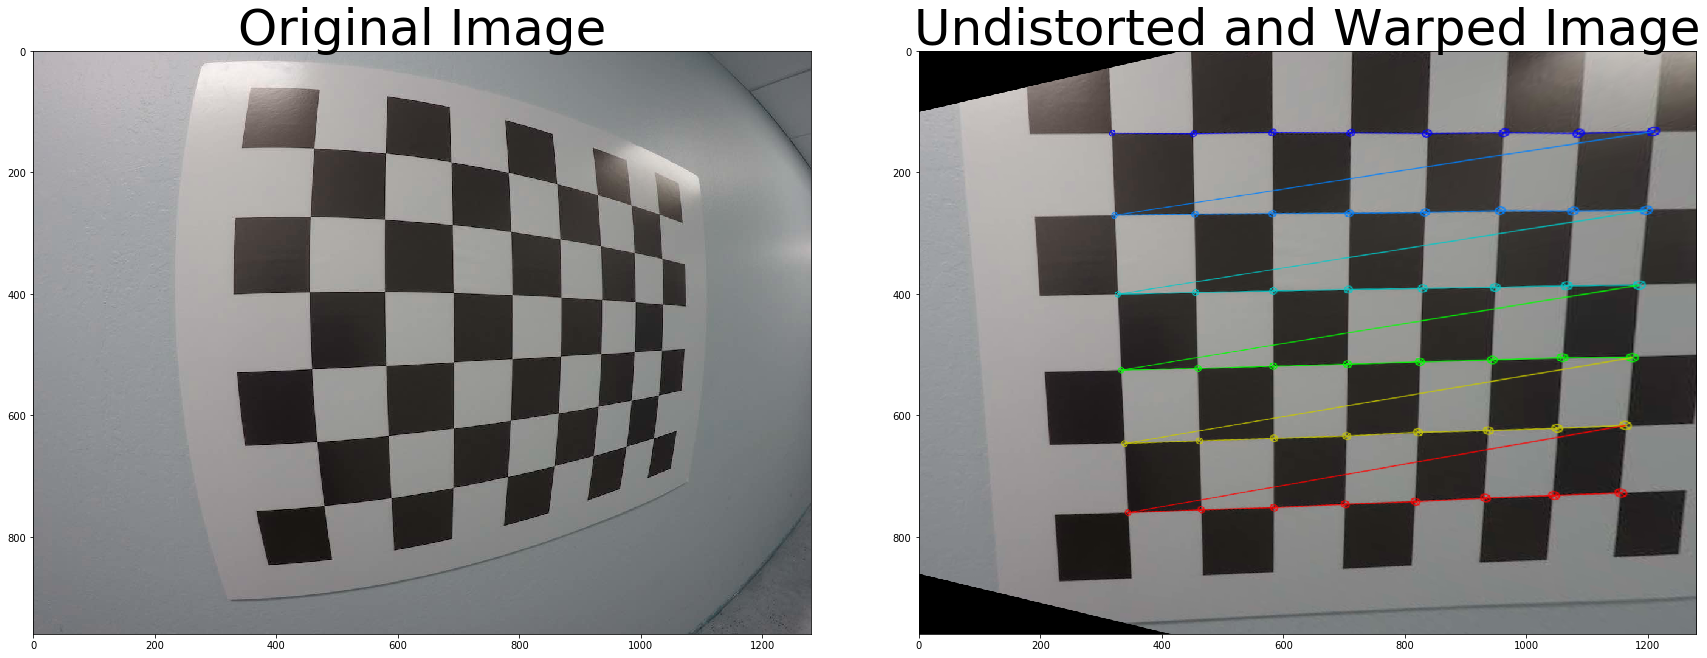

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
img_size = (img.shape[1], img.shape[0])

nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)

    # 2) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    '''
    x_min, y_min = 1000, -1000
    x_max, y_max = -1000, -1000
    for row in corners[::2]:
        pair = row[0]
        x_min = min(x_min, pair[0])
        x_max = max(x_max, pair[0])
        y_min = min(y_min, pair[1])
        y_max = max(y_max, pair[1])

    srcpts = [[x_min, y_min], [x_max, y_max], [x_min, y_max], [x_min, y_max]]
    dstpts = [[200,0],[200,375],[1100, 150],[1100, 800]]
    '''
    
    srcpts = [[300, 50],[300, 950],[1100,200],[1100,780]]
    dstpts = [[200,100],[200,900],[1200,100],[1200,900]]

    # 4) If corners found:
    if ret:
        # a) draw corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
             #Note: you could pick any four of the detected corners
             # as long as those four corners define a rectangle
             #One especially smart way to do this would be to use four well-chosen
             # corners that were automatically detected during the undistortion steps
             #We recommend using the automatic detection of corners in your code
        src = np.float32(srcpts)

        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32(dstpts)

        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)

        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

[[[  436.50708008   114.33555603]]

 [[ 1103.99841309   224.66326904]]

 [[ 1075.51147461   658.02740479]]

 [[  465.32727051   768.5894165 ]]]
[[  100.   100.]
 [ 1180.   100.]
 [ 1180.   860.]
 [  100.   860.]]


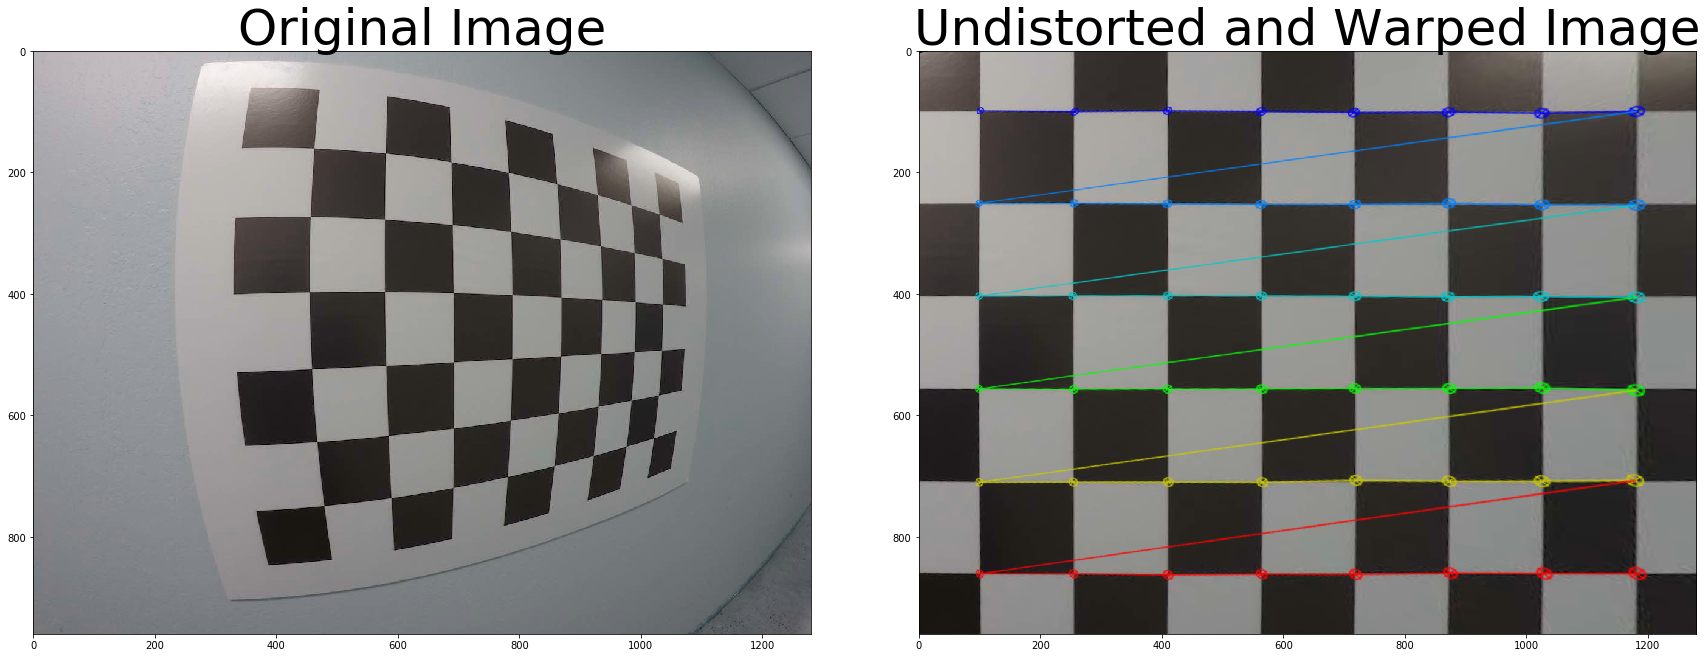

In [17]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
# img_size = (img.shape[1], img.shape[0])

nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)

    # 2) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_size = (gray.shape[1], gray.shape[0])

    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    '''
    x_min, y_min = 1000, -1000
    x_max, y_max = -1000, -1000
    for row in corners[::2]:
        pair = row[0]
        x_min = min(x_min, pair[0])
        x_max = max(x_max, pair[0])
        y_min = min(y_min, pair[1])
        y_max = max(y_max, pair[1])

    srcpts = [[x_min, y_min], [x_max, y_max], [x_min, y_max], [x_min, y_max]]
    dstpts = [[200,0],[200,375],[1100, 150],[1100, 800]]
    '''
    offset = 100
#     srcpts = [[325, 0],[315, 975],[1100,100],[1100,800]]
#     dstpts = [[325,0],[315,975],[1200,50],[1200,850]]

    # 4) If corners found:
    if ret:
        # a) draw corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
             #Note: you could pick any four of the detected corners
             # as long as those four corners define a rectangle
             #One especially smart way to do this would be to use four well-chosen
             # corners that were automatically detected during the undistortion steps
             #We recommend using the automatic detection of corners in your code
#         src = np.float32(srcpts)
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        print(src)

        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
#         dst = np.float32(dstpts)
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                         [img_size[0]-offset, img_size[1]-offset], 
                                         [offset, img_size[1]-offset]])
        print(dst)

        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)

        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)